<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [87]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-btc", interval="minute30", count=800)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-03-21 02:00:00  36969000.0  37225000.0  36891000.0  37117000.0   
2023-03-21 02:30:00  37117000.0  37259000.0  37067000.0  37133000.0   
2023-03-21 03:00:00  37133000.0  37450000.0  37080000.0  37440000.0   
2023-03-21 03:30:00  37440000.0  37601000.0  37419000.0  37534000.0   
2023-03-21 04:00:00  37543000.0  37543000.0  37201000.0  37337000.0   
...                         ...         ...         ...         ...   
2023-04-06 19:00:00  36950000.0  36962000.0  36869000.0  36940000.0   
2023-04-06 19:30:00  36940000.0  36940000.0  36800000.0  36865000.0   
2023-04-06 20:00:00  36866000.0  36965000.0  36864000.0  36947000.0   
2023-04-06 20:30:00  36947000.0  36971000.0  36933000.0  36968000.0   
2023-04-06 21:00:00  36967000.0  36967000.0  36933000.0  36938000.0   

                         volume         value  
2023-03-21 02:00:00  104.307961  3.865901e+09  
2023-03-21 02:30:00   88.173670  3.275055e+09  
202

In [88]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-21 02:00:00,37117000.0
1,2023-03-21 02:30:00,37133000.0
2,2023-03-21 03:00:00,37440000.0
3,2023-03-21 03:30:00,37534000.0
4,2023-03-21 04:00:00,37337000.0
...,...,...
795,2023-04-06 19:00:00,36940000.0
796,2023-04-06 19:30:00,36865000.0
797,2023-04-06 20:00:00,36947000.0
798,2023-04-06 20:30:00,36968000.0


In [89]:
#prophet 불러옴
from fbprophet import Prophet

In [90]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [91]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=25, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


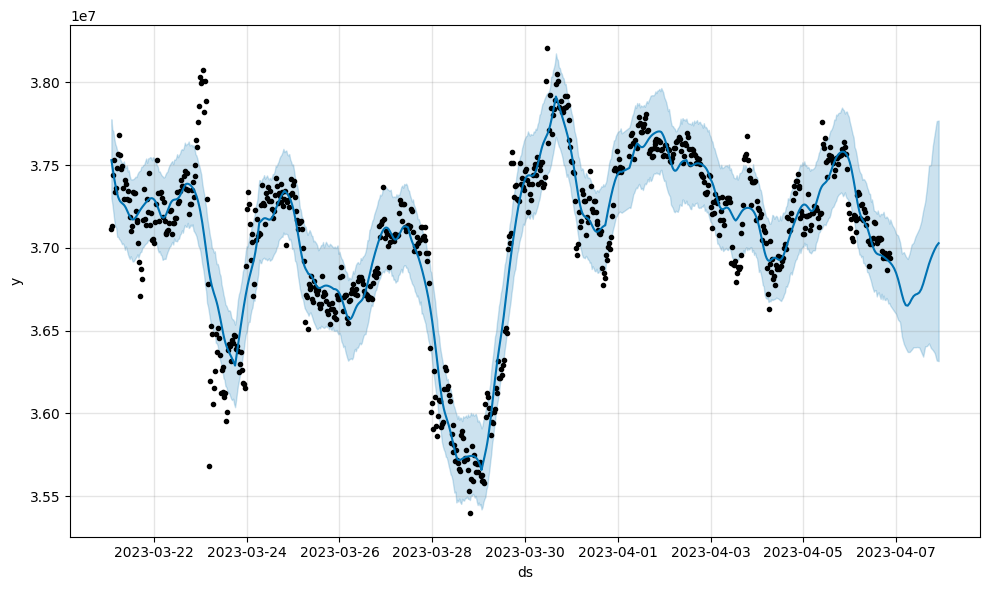

In [92]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


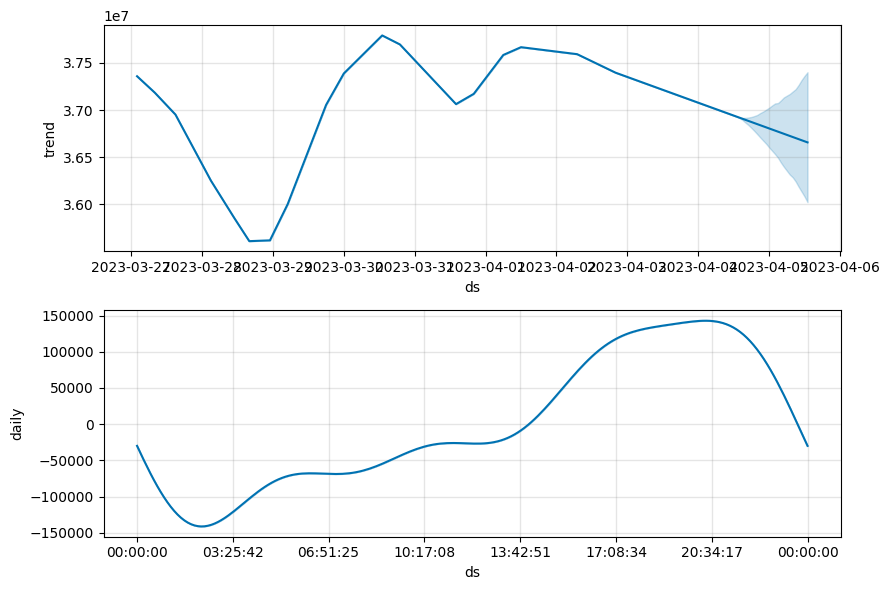

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)